In [224]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import squarify
import plotly
from plotly import graph_objs as go
pd.set_option('display.max_columns', 400)
pd.set_option('display.max_rows', 20100)

%matplotlib inline

In [203]:
df = pd.read_csv('data/supermarket_clean.csv')

In [205]:
df.head(3)

,Invoice ID,City,Customer Type,Gender,Product Category,Unit Price,Quantity,Total,Date,Hour,Payment,COGS,GMP,Gross Income,Rating,Rating Range,Hour Range
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13,Ewallet,522.83,4.761905,26.1415,9.1,9 ~ 10,11 ~ 13
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10,Cash,76.40,4.761905,3.8200,9.6,9 ~ 10,9 ~ 11
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,13,Credit card,324.31,4.761905,16.2155,7.4,7 ~ 9,11 ~ 13


In [248]:
df.describe()

,Unit Price,Quantity,Total,Hour,COGS,GMP,Gross Income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,322.966749,14.910000,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,245.885335,3.186857,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,10.678500,10.000000,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,124.422375,12.000000,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,253.848000,15.000000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,471.350250,18.000000,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,1042.650000,20.000000,993.00000,4.761905e+00,49.650000,10.00000


### berapa rata-rata total pembelian per-invoice dalam sehari baik secara keseluruhan maupun berdasarkan gender ?

In [211]:
df_average_gender = df.groupby(['Date','Gender'])['Total'].mean().unstack().reset_index()

In [232]:
def plot_raw_data(data):
    # make a dummy time data

    x_values = pd.date_range(start=pd.Timestamp('2018-01-01'), end=pd.Timestamp('2019-01-01'), freq='1 D')

    # making a random time series
    y_values = np.random.randn(len(x_values))

    # making color list
    # red if the day is saturday or sunday else green

    colors = ['red' if int(pd.Timestamp(d).weekday()) >= 5 else 'green' for d in x_values]
    fig = go.Figure()
    for val in data:
        fig.add_trace(go.Scatter(x=df_average_gender['Date'], 
                                 y=df_average_gender[val], 
                                 name=val,
                                mode='lines+markers',
                                  marker=dict(
        color = colors
    )
    )),
        fig.layout.update(title_text='Average customer daily purchasing based on Gender, green marker represent weekday and red marker represent weekend', hovermode='x')
    fig.show()

plot_raw_data(['Female','Male'])

## function to create pie chart

In [236]:
import plotly.express as px

def pie_chart(val):
    data_pie =  df.groupby([val])['Invoice ID'].count().reset_index().rename(columns = {'Invoice ID':'Total'})
    fig = px.pie(data_pie, values='Total', 
                 names=val, color=val, 
                 color_discrete_sequence=px.colors.sequential.Teal)
    fig.show()

##### Bagaimana prosentase sebaran kategori produk yang dibeli oleh customer

In [240]:
pie_chart('Product Category')

##### Bagaimana prosentase sebaran jenis pembayaran yang digunakan oleh customer

In [241]:
pie_chart('Payment')

## function to generate percentage by distribution

In [242]:
def percentage_distribution(column, value, data1, data2):
    #aggregate function to generate new dataframe
    data_cg =  df.groupby([column,value]).size().unstack()
    data_cg['sum'] = data_cg.sum(axis=1)
    data_cg_ratio = (data_cg.T / data_cg['sum']).T[[data1, data2]][::-1]
    
    fig, ax = plt.subplots(1,1,figsize=(12, 6),)

    ax.barh(data_cg_ratio.index, data_cg_ratio[data1], 
            color='#244247', alpha=0.7, label=data1)
    ax.barh(data_cg_ratio.index, data_cg_ratio[data2], left=data_cg_ratio[data1], 
            color='#91b8bd', alpha=0.7, label=data2)


    ax.set_xlim(0, 1)
    ax.set_xticks([])
    ax.set_yticklabels((data_cg_ratio.index), fontfamily='serif', fontsize=11)


    # male percentage
    for i in data_cg_ratio.index:
        ax.annotate(f"{data_cg_ratio[data1][i]*100:.3}%", 
                       xy=(data_cg_ratio[data1][i]/2, i),
                       va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                       color='white')

    for i in data_cg_ratio.index:
        ax.annotate(f"{data_cg_ratio[data2][i]*100:.3}%", 
                       xy=(data_cg_ratio[data1][i]+data_cg_ratio[data2][i]/2, i),
                       va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                       color='#244247')

    if column == 'Product Category':
        fig.text(0.129, 0.98, 'Gender distribution by Product Category', fontsize=15, fontweight='bold', fontfamily='serif')   
        fig.text(0.129, 0.9, 
                 '''
        We find no significance difference between male and female in purchase every category,
        But we find something interesting in category Health and Beauty, male more dominant than female?''' , fontsize=12,fontfamily='serif')  
    if column == 'Payment':
        fig.text(0.129, 0.98, 'Gender distribution by Payment', fontsize=15, fontweight='bold', fontfamily='serif')   
        fig.text(0.129, 0.9, 
                 '''
        We see that Male more prefer to use E-wallet than Females
        ''' , fontsize=12,fontfamily='serif') 

    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)

    ax.legend().set_visible(False)

    fig.text(0.77,0.98,data1, fontweight="bold", fontfamily='serif', fontsize=15, color='#244247')
    fig.text(0.819,0.98,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
    fig.text(0.827,0.98,data2, fontweight="bold", fontfamily='serif', fontsize=15, color='#0e7687')
    plt.show()
    

##### bagaimana distribusi jenis pembayaran yang digunakan customer berdasarkan gender ?


/var/folders/gg/b7yxvccn3v9c6z2xy6jpjydm0000gp/T/ipykernel_728/2900598092.py:17: UserWarning:

FixedFormatter should only be used together with FixedLocator



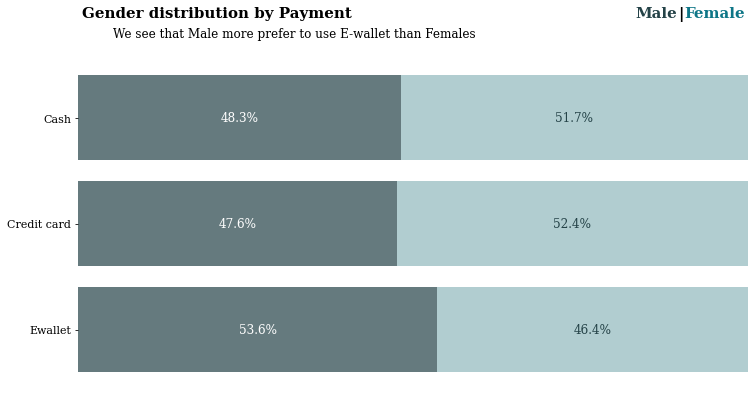

In [243]:
percentage_distribution('Payment','Gender','Male','Female')

##### bagaimana distribusi kategori yang dibeli oleh customer berdasarkan gender ?

/var/folders/gg/b7yxvccn3v9c6z2xy6jpjydm0000gp/T/ipykernel_728/3899454520.py:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



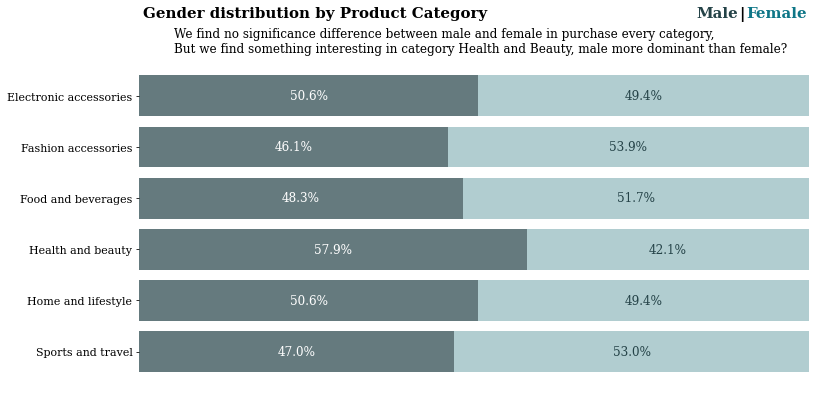

In [130]:
percentage_distribution('Product Category','Gender','Male','Female')

## Function to generate Histogram

In [261]:
# Order for plotting categorical vars
def bar_plot(value):
    if value == 'Hour Range':
        ab_order = ['9 ~ 11', '11 ~ 13', '13 ~ 15','15 ~ 17', '17 ~ 19', '19 ~ 21']
        color_map = ['#d4dddd' for _ in range(9)]
        color_map[4] = '#244747' 
    if value == 'Rating Range':
        ab_order = ['3 ~ 5','5 ~ 7', '7 ~ 9', '9 ~ 10']
        color_map = ['#d4dddd' for _ in range(9)]
        color_map[2] = '#244747' 
    data = df[value].value_counts()[ab_order]

    fig, ax = plt.subplots(1,1, figsize=(9, 6))
    ax.bar(data.index, data, width=0.5, 
           edgecolor='darkgray',
           linewidth=0.6,color=color_map)

    #annotations
    for i in data.index:
        ax.annotate(f"{data[i]}", 
                       xy=(i, data[i] + 3), #i like to change this to roughly 5% of the highest cat
                       va = 'center', ha='center',fontweight='light', fontfamily='serif')

    for s in ['top', 'left', 'right']:
        ax.spines[s].set_visible(False)

    ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

    # Title and sub-title

    fig.text(0.09, 1, 'Distribution by Time Buying', fontsize=20, fontweight='bold', fontfamily='serif')
    fig.text(0.09, 0.95, 'The two most numerous age bands have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

    fig.text(1.185, 1.01, 'Insight', fontsize=20, fontweight='bold', fontfamily='serif')

    fig.text(1.185, 0.715, '''
    The two most frequent age bands are 20-30 
    and 30-40. In the early stages of our 
    exploratory analysis, we can already start
    to think about who our most important customers
    are and, importantly, how we might tailor our
    marketing activities or promotional offers based
    on customer segments.
    '''
             , fontsize=12, fontweight='light', fontfamily='serif')

    ax.grid(axis='y', linestyle='-', alpha=0.4)   

    if value == 'Hour Range':
        grid_y_ticks = np.arange(0, 250, 20) # y ticks, min, max, then step
    else:
        grid_y_ticks = np.arange(0, 400, 20)
    ax.set_yticks(grid_y_ticks)
    ax.set_axisbelow(True)

    # Axis labels

    plt.xlabel("Time banding", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)


    # thicken the bottom line if you want to
    plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

    import matplotlib.lines as lines
    l1 = lines.Line2D([1.05, 1.05], [0, 1.05], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
    fig.lines.extend([l1])

    plt.show()

/var/folders/gg/b7yxvccn3v9c6z2xy6jpjydm0000gp/T/ipykernel_728/483360065.py:27: UserWarning:

FixedFormatter should only be used together with FixedLocator



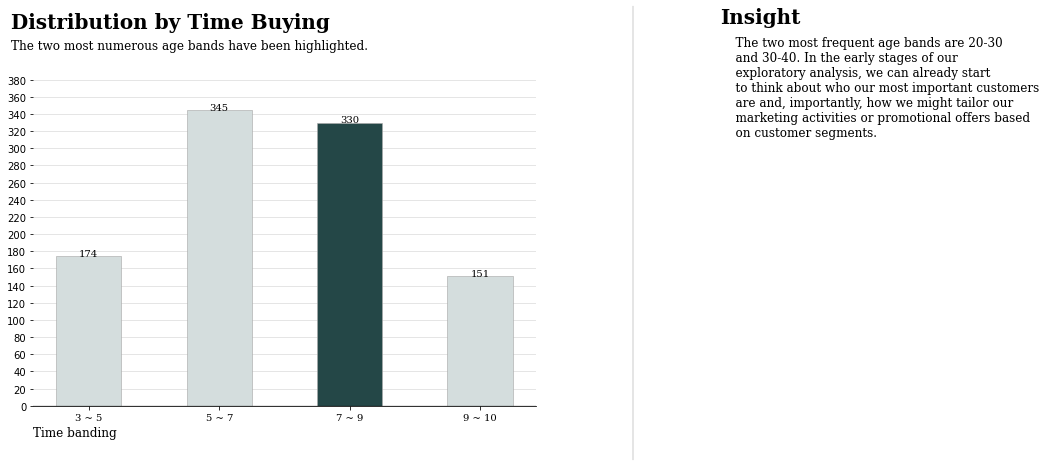

In [262]:
bar_plot('Rating Range')